In [38]:
#THe aim of this second project is to perfom a PCA in Python using scikit-learn library; but we have two phases; first of all.
# First By using a sample dataset from scikit-learn to see how it works
#And second by usinh a data set downloaded in Kaggle.com website and we use it to perform the second part of our project

In [50]:
#to perform PCA in python, we can use the scikit-learn library; the first step is to import the necessary modules
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [51]:
#Next we can load a sample dataset from scikit-learn
iris = load_iris()
X = iris.data
Y = iris.target
#Here 'X' contains the features(or independent variables) and 'y' contains the target variable(or dependent variable). we can perform PCA on 'X' using 'PCA()' from scikit-learn:

In [52]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
#Here, we specified that we want to reduce 'X' to two dimensions('n_components=2'). The 'fit_transform()'method fits the PCA model ot the data and then transforms it to the reduced dimensionality

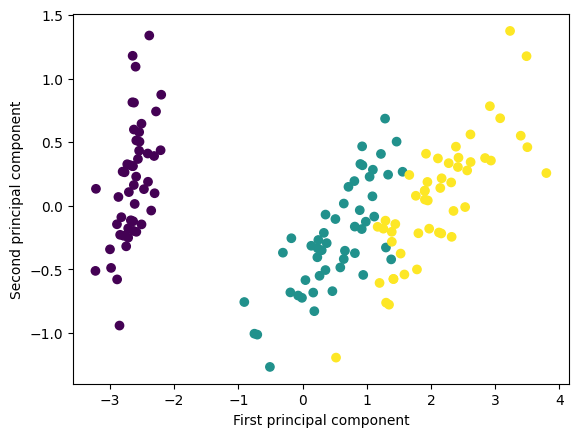

In [53]:
#We can then plot the reduced data using matplotlib:
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=Y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [54]:
#Step-by-step PCA with Python and Scikit-Learn
#In this section, we will go through a step-by-step implementation of PCA using Python and Scikit-Learn. The steps involved are:

#Step 1: Import Libraries and Load Data
#Step 2: Standardize the Data
#Step 3: Compute Covariance Matrix
#Step 4: Compute Eigenvectors and Eigenvalues
#Step 5: Sort Eigenvalues in Descending Order
#Step 6: Choose Principal Components
#Step 7: Project Data Onto Lower-Dimensional Linear Subspace


In [55]:
#STEP 1: IMPORT LIBRARIES AND LOAD DATA
#The first step is to import the necessary libraries and load the data that you want to perform PCA on
#Here we cchoose a data from our side in order to perform the PCA as an example
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#train_data = pd.read_csv('/Users/admin-20218/Downloads/house-prices-advanced-regression-techniques/train.csv')
#x = train_data
sample_submission = pd.read_csv('/Users/admin-20218/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')
y = sample_submission


In [56]:
#STEP 2: STANDARDIZE THE DATA
#PCA is sensitive to the scale of the input data, so it’s important to standardize the data before performing PCA. Standardization involves scaling the data so that it has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

In [57]:
#STEP 3: COMPUTE COVARIANCE MATRIX
#The next step is to compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the data.
cov_matrix = np.cov(y_scaled.T)

In [58]:
print(cov_matrix)
#we notice that the covariance matrix is a symmetric matrix form by the cov values

[[1.00068587 0.12625122]
 [0.12625122 1.00068587]]


In [59]:
#STEP 4: COMPUTE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX
#The eigenvectors and eigenvalues of the covariance matrix are used to determine the principal components of the data. The eigenvectors represent the directions of maximum variance in the data, while the corresponding eigenvalues represent the amount of variance explained by each eigenvector.

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [60]:
print(eigen_values)
print(eigen_vectors)

[1.12693709 0.87443465]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [61]:
#STEP 5: SORT EIGENVALUES IN DESCENDING ORDER
#The next step is to sort the eigenvalues in descending order. This will allow us to choose the principal components that explain the most variance in the data.

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [62]:
print(sorted_eigenvectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [63]:
#STEP 6: CHOOSE PRINCIPAL COMPONENTS
#The next step is to choose the principal components that we want to keep. We can do this by selecting the top k eigenvectors that correspond to the k largest eigenvalues.
#Here, we choose k=2 as an example and select the first two eigenvectors from sorted_eigenvectors to be our principal components.

k = 2
principal_components = sorted_eigenvectors[:,:k]

In [64]:
print(principal_components)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [65]:
#STEP 7: PROJECT DATA ONTO LOWER-DIMENSIONAL LINEAR SUBSPACE
#The final step is to project the data onto the lower-dimensional linear subspace defined by the principal components. This will transform the data from its original high-dimensional space into a lower-dimensional space while retaining as much of the original information as possible.

y_new = np.dot(y_scaled, principal_components)

In [66]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)
y_reduced = pca.fit_transform(y)


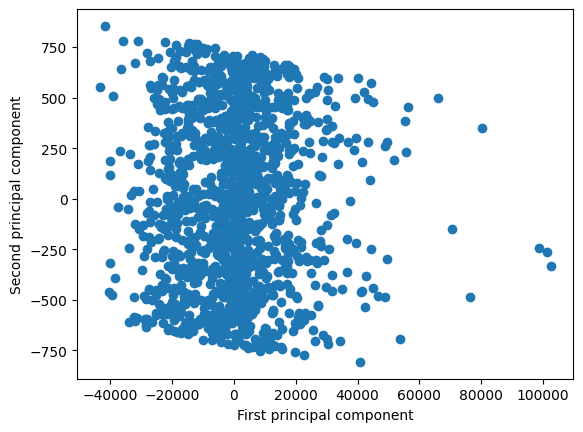

In [72]:
#We can then plot the reduced data using matplotlib:
plt.scatter(y_reduced[:, 0], y_reduced[:, 1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


In [ ]:
#Evaluating the Results of PCA
#After performing Principal Component Analysis (PCA), it is important to evaluate the results to ensure that it has achieved its purpose. There are several ways to evaluate the results of PCA, including variance explained, cumulative variance explained, and scree plot.

In [39]:
# Fit PCA on X
pca = PCA().fit(y)


In [40]:
# Calculate Variance Explained
var_exp = pca.explained_variance_ratio_

In [41]:
# Calculate Cumulative Variance Explained
cum_var_exp = np.cumsum(var_exp)

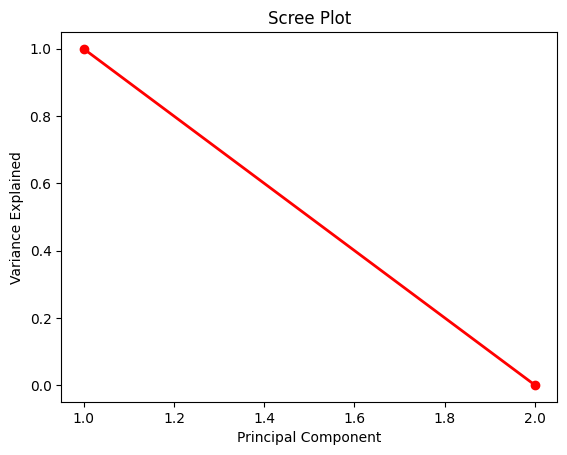

In [42]:
# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:
#In the code above, we first create an array with values of our dataset and fit PCA on it. We then calculate the variance explained by each principal component using the `explained_variance_ratio_` attribute of PCA. Next, we calculate the cumulative variance explained by each principal component using the `cumsum()` function of numpy.

#Finally, we plot a scree plot using the `plot()` function of matplotlib. The x-axis represents the principal components and the y-axis represents the variance explained. The scree plot helps us determine how many principal components to retain for analysis. The plot output would look like this:

